In [138]:
!pip install nltk
!pip install seaborn
import re
import requests
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/docode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
def get_content(article_name):
    url = "https://en.wikipedia.org/w/api.php"
    extract_data = requests.get(url, params = {"action": "query", "prop": "extracts", "titles": article_name, "format": "json"})
    data = extract_data.json()
    return data

In [140]:
def merge_contents(data):
    dirty_text = data['query']['pages']['22834']['extract']
    cleanr = re.compile('<.*?>')
    clean_data = re.sub(cleanr, '', dirty_text)
    return clean_data

In [141]:
def tokenize(content):
    words = content.split()
    table = str.maketrans('', '', string.punctuation)
    raw_words = [w.translate(table) for w in words]
    clean_words = [word.lower() for word in raw_words if word.isalpha()]
    return clean_words

In [142]:
def remove_stop_words(words, stop_words):
    word_without = [i for i in words if len(i) > 2 and not i in stop_words]
    return word_without

In [143]:
def count_frequency(collection):
    dict_of_words = {}
    for i in collection:
        dict_of_words[i] = collection.count(i)
    result = dict(sorted(dict_of_words.items(), key=lambda x:x[1], reverse=True))
    return result

In [144]:
def print_most_frequent(frequencies, n):
    most_n_f = {k: frequencies[k] for k in list(frequencies)[:n]}
    return most_n_f

In [145]:
def build_graph(frequencies):
    plt.figure(figsize=(10,10))
    x_axis = [v for k,v in frequencies.items()]
    y_axis = [k for k,v in frequencies.items()]
    sns.barplot(x=x_axis[0:25], y=y_axis[0:25])
    plt.show()

In [146]:
def main():
    raw_data = get_content("Ozone layer")
    stop_words = stopwords.words("english")
    merge_content = merge_contents(raw_data)
    collection = tokenize(merge_content)
    filtered_collection = remove_stop_words(collection, stop_words)
    frequencies = count_frequency(filtered_collection)
    most_frequent = print_most_frequent(frequencies, 25)
    build_graph(most_frequent)

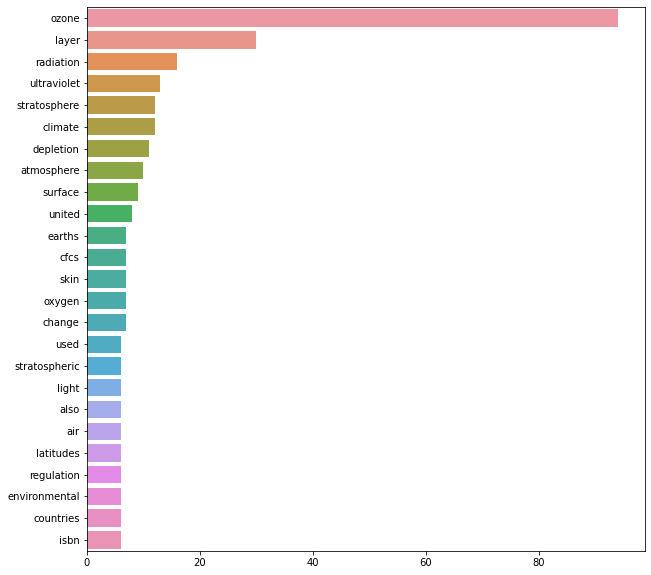

In [147]:
main()